In [2]:
## importamos las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# ESTUDIO Y PROCESAMIENTO DE DATOS

In [3]:
## vamos a echar un vistazo a la base de datos de spaceshiptitanic trabajanndo sobre el train ('train.csv')

df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# EDA

In [23]:
from pandas_profiling import ProfileReport

In [25]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

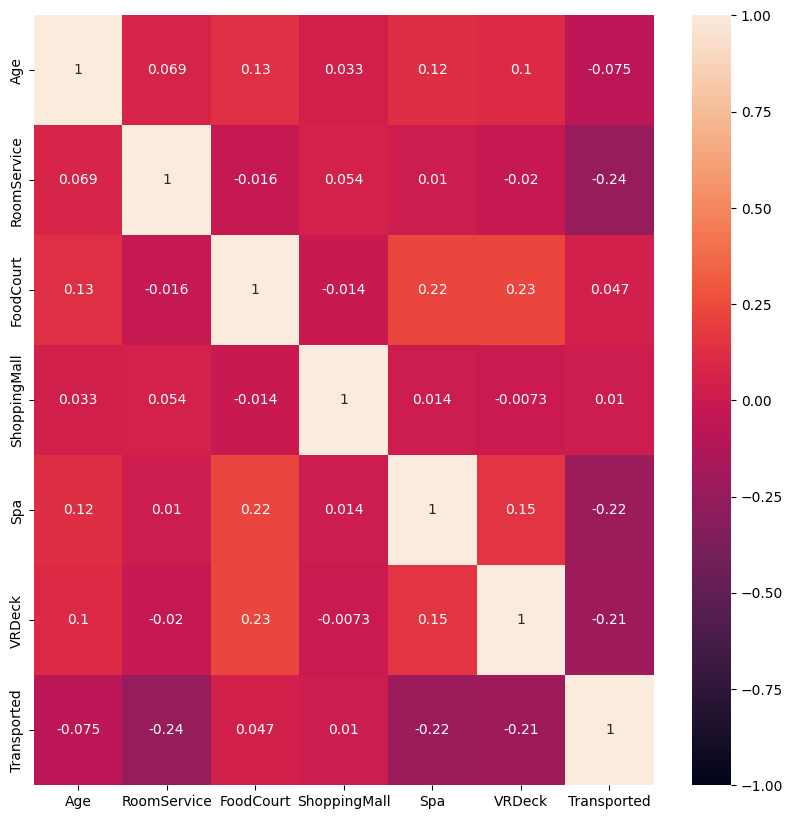

In [28]:
fig = plt.figure(figsize=(10., 10.))
ax = sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


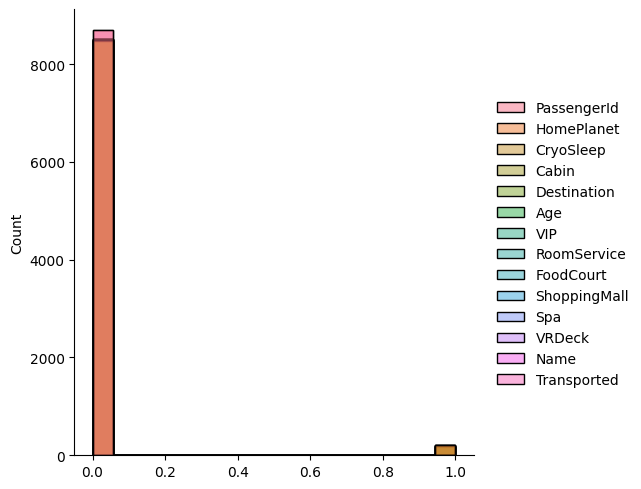

In [29]:
sns.displot(df.isnull())

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

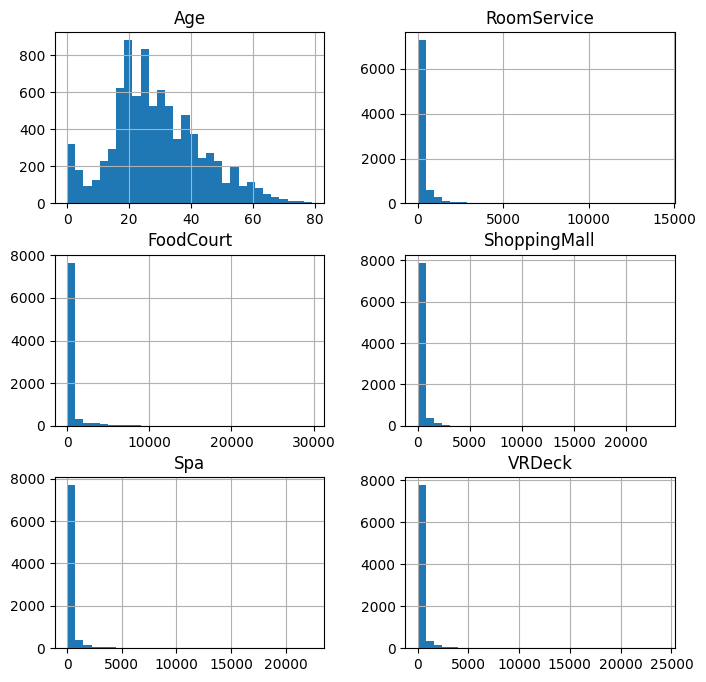

In [30]:
df.hist(bins= 30, figsize=(8,8))

In [31]:
# La columna passengerid contiene varia información, donde los 4 primeros díogitos indican el número de grupo con el que viajan y los
# dos ultimos dígitos es su número dentro del grupo. Algunos grupos suelen estar formados por un miembros familiares aunque no siempre.
# Si los dos ultimos dígitos contienen >= _02 significa que existe un grupo que tiene varias personas. Por ejemplo el 0003_02, donde viajan 2 personas.

df['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [32]:
#La columna cabin está dividida en deck (plataforma)/ num(número) / side(lado). Donde side puede ser S starboard(estribor) o P port(babor)

df['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [33]:
#Las variables RoomService, FoodCourt, ShoppingMall, Spa, VRDeck hacen referencia a variables de tipo monetarias que los pasajeros habrian pagado.
#La variable target tal y como nos dice Kaggle en el enunciado es 'Transported', por lo que podemos decir que abordaremos un análisis de machine learning de aprendizaje supervisado.
#Al ser de tipo bool, quiere decir que tendremos que hacer una predicción sobre un modelo de clasificación binaria, porque tendremos dos posibilidades que el pasajero sea transportado o no.
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [34]:
#Empezarermos comprobando si existen valores missing o valores no existentes en las distintas columnas del dataframe. 
#Si nos fijamos en la celda superior observamos "Rageindex: 8693 entries", esta es la cifra total que debe disponer cada columna o variable a analizar si dispone menos
#de esa cifra querrá decir que existen valores missing en esa variable. De todas formas vamos a concretar exactamente cuantos valores missing tenemos en cada variable.

df.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [35]:
## Creo una funcion para dividir la variable cabin

def cabina_div(x):
    if len(str(x).split('/')) < 3:
        return ['Missing','Missing','Missing']
    else:
        return str(x).split('/')


In [36]:
#Una vez vistos estos valores missing, debemos completar o rellenar esa información carente de las variables, para que nuestro modelo pueda predecir con buena precisión nuestro target.
#Para ello voy a crear una función que me permita hacer todas las transformaciones en una función, para que despues pueda aplicarlo cómodamente sobre el test.

def processing_features(df):
    '''Rellenamos los missing de HomePlanet'''
    
    
    df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace= True)
    
    '''Dividimos la columna Cabin para sacar el deck(plataforma) y el side(lado)'''
    df['Cabin'].fillna(df['Cabin'].mode()[0])
    df['Cab_div'] = df['Cabin'].apply(lambda x: cabina_div(x))
    df['Deck'] = df['Cab_div'].apply(lambda x: x[0])
    df['Side'] = df['Cab_div'].apply(lambda x: x[2])
    df.drop(['Cab_div','Cabin'], axis=1, inplace= True)

    ''' Rellenamos los missing de CryoSleep'''
    df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace= True)

    '''Rellenamos los missing de VIP'''
    df['VIP'].fillna(df['VIP'].mode()[0], inplace= True)

    '''Rellenamos los missing de Destination'''
    df['Destination'].fillna(df['Destination'].mode().values[0], inplace= True)
    '''Rellenamos los missing de la edad, con la edad media'''
    df['Age'].fillna(df['Age'].mean(), inplace = True)

    '''Rellenamos los missing de RoomService, FoodCourt, ShoppingMall, Spa, VRDeck'''
    df['RoomService'].fillna(df['RoomService'].mean(), inplace = True)
    df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace = True)
    df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
    df['Spa'].fillna(df['Spa'].mean(), inplace = True)
    df['VRDeck'].fillna(df['VRDeck'].mean(), inplace = True)
    
    ''' Eliminamos la columna Name'''
    df.drop('Name',axis =1, inplace=True)

    # '''Eliminamos las filas restantes con valores missing'''
    # df.dropna(inplace=True)


In [37]:
copia = df.copy()

In [38]:
copia

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [39]:
copia.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [40]:
processing_features(copia)

In [41]:
copia.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

In [42]:
# Una vez aplicada la funcion de procesamiento de las variables, ya nos tendremos ningun missing value
copia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [43]:
copia.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

# ENTRENAMIENTO DE MODELOS

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [46]:
#Creamos la variables para entrenar los modelos (las features y el target)
#En la variable X voy a poner los features, por tanto excluyo el target con drop y el passengerId puesto que de momento no lo voy a necesitar para entrenar los modelos.
#Tambien, aplicaré get dummies del df puesto que existen features ctegóricas y necesito pasarlas a binarias. 
# (Si aplico el get dummmies con PassengerId tendré informacion irrelevante, y un exceso de columnas, por tanto la borro, de la misma forma que cabin, al estar desmenuzada la informacioón de la columna. Esta útlima fue dropeada
# en la función de procesamiento de datos)

X = copia.drop(['Transported','PassengerId'], axis = 1)

#Transformación de la columnas categóricas del df a binarias, con get dummies
X= pd.get_dummies(X)

#Definición del target
y = copia['Transported']



In [47]:
#Hacemos el split de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T,Side_Missing,Side_P,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
len(X.columns)

26

In [50]:
#Empezamos probando el modelo con RandomForestClassifier 

rdom = RandomForestClassifier(n_estimators=100,min_samples_leaf = 30)
param = {'n_estimators':[100]}

gridcv = GridSearchCV(rdom,param_grid = param,cv=5)
gridcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(min_samples_leaf=30),
             param_grid={'n_estimators': [100]})

In [51]:
y_hat = gridcv.predict(X_test)
y_hat_train = gridcv.predict(X_train)


from sklearn.metrics import accuracy_score

print('MODELO RANDOM FOREST')
print('Accuracy test' ,accuracy_score(y_test,y_hat))
print('Accuracy train' ,accuracy_score(y_train,y_hat_train))

MODELO RANDOM FOREST
Accuracy test 0.7918343875790684
Accuracy train 0.810468794938165


In [52]:
from sklearn.linear_model import LogisticRegressionCV
logi = LogisticRegressionCV(max_iter = 80, random_state=0)
logi.fit(X_train, y_train)

y_hat_logi = logi.predict(X_test)
y_hat_logi_train = logi.predict(X_train)

from sklearn.metrics import accuracy_score

print('MODELO REGRESION LOGÍSTICA')
print('Accuracy test' ,accuracy_score(y_test,y_hat_logi))
print('Accuracy train' ,accuracy_score(y_train,y_hat_logi_train))

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

MODELO REGRESION LOGÍSTICA
Accuracy test 0.7901092581943646
Accuracy train 0.7973828012654587


In [71]:
##Guardamos los modelos para poner en producción

import pickle

pickle.dump(logi, open('logistic-model.sav','wb'))
pickle.dump(rdom, open('randomforest-model.sav','wb'))
pickle.dump(svc_tr, open('svc-model.sav','wb'))

In [53]:
##Matriz de confusion del mejor modelo


import sklearn.metrics as metrics
predictions = logi.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[624 239]
 [126 750]]


<AxesSubplot:>

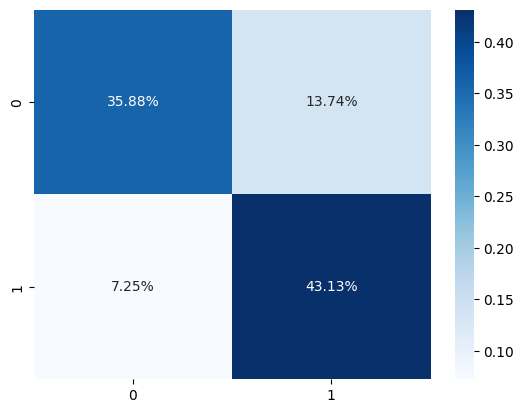

In [75]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [54]:
from sklearn.svm import SVC

svc_tr = SVC()
svc_tr.fit(X_train,y_train)
svc_tr.predict(X_test)
y_hat_svc = svc_tr.predict(X_test)
y_hat_train_svc = svc_tr.predict(X_train)

print('MODELO SVC')
print('Accuracy test' ,accuracy_score(y_test,y_hat_svc))
print('Accuracy train' ,accuracy_score(y_train,y_hat_train_svc))


MODELO SVC
Accuracy test 0.7780333525014376
Accuracy train 0.7923497267759563


## Aplicamos al test el modelo

In [55]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [56]:
df_test2 = pd.read_csv('test.csv')
df_test2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [57]:
copia2 = df_test.copy()

In [58]:
processing_features(copia2)

In [59]:
copia2

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Missing,Missing
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,D,P
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,D,P


In [60]:
copia2 = pd.get_dummies(copia2.drop('PassengerId', axis=1))



In [61]:
copia2.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_Missing', 'Deck_T', 'Side_Missing', 'Side_P', 'Side_S'],
      dtype='object')

## Submisions 

In [62]:
prediccion = pd.DataFrame(gridcv.predict(copia2))
prediccion['PassengerId'] = df_test2['PassengerId']
prediccion = prediccion.rename(columns= {0:'Transported'})
prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('sub6.csv',index= False)
prediccion

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [63]:
prediccion = pd.DataFrame(logi.predict(copia2))
prediccion['PassengerId'] = df_test2['PassengerId']
prediccion = prediccion.rename(columns= {0:'Transported'})
prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('sub7.csv',index= False)
prediccion

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [64]:
prediccion = pd.DataFrame(svc_tr.predict(copia2))
prediccion['PassengerId'] = df_test2['PassengerId']
prediccion = prediccion.rename(columns= {0:'Transported'})
prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('sub8.csv',index= False)
prediccion

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [65]:
prediccion = pd.DataFrame(gridcv.predict(copia2))
prediccion['PassengerId'] = df_test2['PassengerId']
prediccion = prediccion.rename(columns= {0:'Transported'})
prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('sub9.csv',index= False)
prediccion

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
